### What is an outlier?
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.




### What is the reason for an outlier to exists in a dataset?
1. Variability in the data
2. An experimental measurement error ...

### What are the impacts of having outliers in a dataset?
1. It causes various problems during our statistical analysis
2. It may cause a significant impact on the mean and the standard deviation


### Various ways of finding the outlier.
1. Using scatter plots
2. Box plot
3. using z score
4. using the IQR interquantile range

### Discussion Related With Outliers And Impact On Machine Learning!!
### Which Machine Learning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Using scatter plot

In [19]:
# Every one knows this. just use scatter from matplotlib and it is easy to find the outliers visually.

### 2. Box Plot

<AxesSubplot:xlabel='Age'>

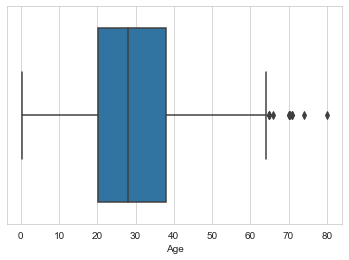

In [21]:
sns.set_style(style='whitegrid')
sns.boxplot(df.Age)                   # It is easy to find the value more than 65 is outlier.

### 3. Using Z-score
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [43]:
threshold = 3
outliers=[]
def zscore(df,variable):
    m=df[variable].mean()
    s=df[variable].std()
    for i in df[variable]:
        z=(i-m)/s
        if z>threshold:
            outliers.append(i)
    return outliers

In [44]:
zscore(df,'Age')

[80.0, 74.0]

### 4. using the IQR interquantile range --------| mostly used when feature is skewed

75%- 25% values in a dataset

Steps
1. Calculate first(q1) and third quartile(q3)
2. Find interquartile range (q3-q1)
3. Find lower bound q1-1.5IQR
4. Find upper bound q3+1.5IQR

Anything that lies outside of lower and upper bound is an outlier

In [32]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)

In [33]:
upper_bound=df['Age'].quantile(0.75)+(1.5*IQR)
lower_bound=df['Age'].quantile(0.25)-(1.5*IQR)

In [37]:
print('range :',lower_bound,'to',upper_bound)

range : -6.6875 to 64.8125


### If The Data Is Normally Distributed We use this
1. upper limit=mean + 3*std
2. lower limit=mean - 3*std

In [38]:
upper_limit=df['Age'].mean()+(3*df['Age'].std())
lower_limit=df['Age'].mean()-(3*df['Age'].std())
print('range :',lower_limit,'to',upper_limit)

range : -13.88037434994331 to 73.27860964406095
